## Importing Data

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('..\\Datasets\\e-commerce_data.csv', encoding='latin1')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


---
## Data Handling

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df_clean = df.dropna(subset=['CustomerID'])

df_clean.drop_duplicates(inplace=True)

In [6]:
# Remove negative quantities
df_clean = df_clean[df_clean['Quantity'] > 0]

# Remove rows with extremely high quantities or unit prices
quantity_threshold = df_clean['Quantity'].quantile(0.99)
unit_price_threshold = df_clean['UnitPrice'].quantile(0.99)

df_clean = df_clean[df_clean['Quantity'] <= quantity_threshold]
df_clean = df_clean[df_clean['UnitPrice'] <= unit_price_threshold]

df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [7]:
df_final = df_clean.drop(['Description', 'StockCode'], axis=1)

df_final.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# Countries with a percentage below 0.3% will be set to 'Other' for easier caluclations
country_counts = df_final['Country'].value_counts(normalize=True) * 100
small_countries = country_counts[country_counts < 0.2].index
df_final['Country'] = df_final['Country'].apply(lambda x: 'Other' if x in small_countries else x)

df_final['Country'].value_counts(normalize=True) * 100

Country
United Kingdom    89.397193
Germany            2.222972
France             2.064578
EIRE               1.785181
Other              1.592771
Spain              0.615401
Belgium            0.493619
Netherlands        0.474663
Switzerland        0.466874
Portugal           0.367163
Norway             0.268232
Australia          0.251353
Name: proportion, dtype: float64

---
## EDA

In [9]:
df_final.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,385115.000000,385115,385115.000000,385115.000000
mean,10.009086,2011-07-10 21:12:07.546524928,2.730919,15296.126168
min,1.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13969.000000
50%,6.000000,2011-07-31 12:52:00,1.950000,15159.000000
75%,12.000000,2011-10-20 13:20:00,3.750000,16794.000000
max,120.000000,2011-12-09 12:50:00,14.950000,18287.000000
std,14.643049,NaN,2.545572,1709.614253


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

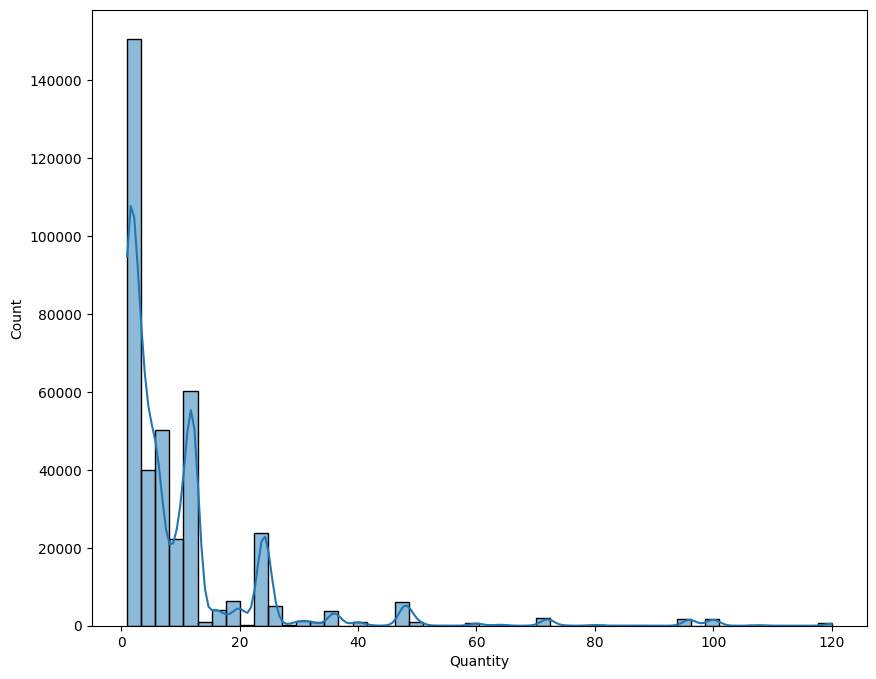

In [11]:
plt.figure(figsize=(10, 8))
sns.histplot(df_final['Quantity'], bins=50, kde=True)
plt.show()

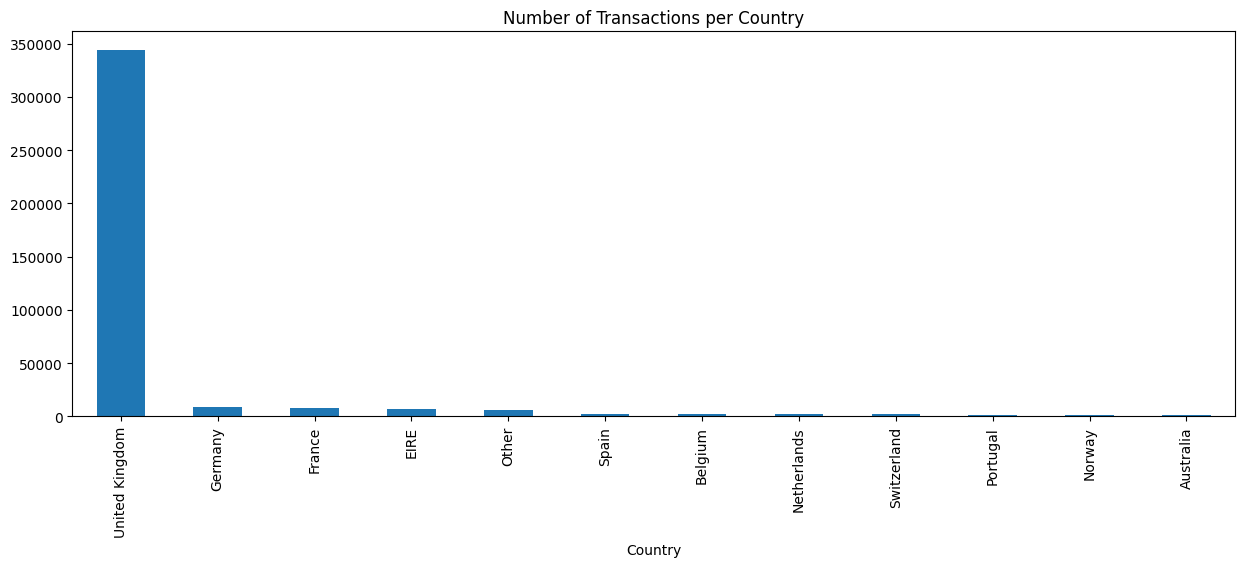

In [12]:
plt.figure(figsize=(15, 5))
df_final['Country'].value_counts().plot(kind='bar')
plt.title('Number of Transactions per Country')
plt.show()

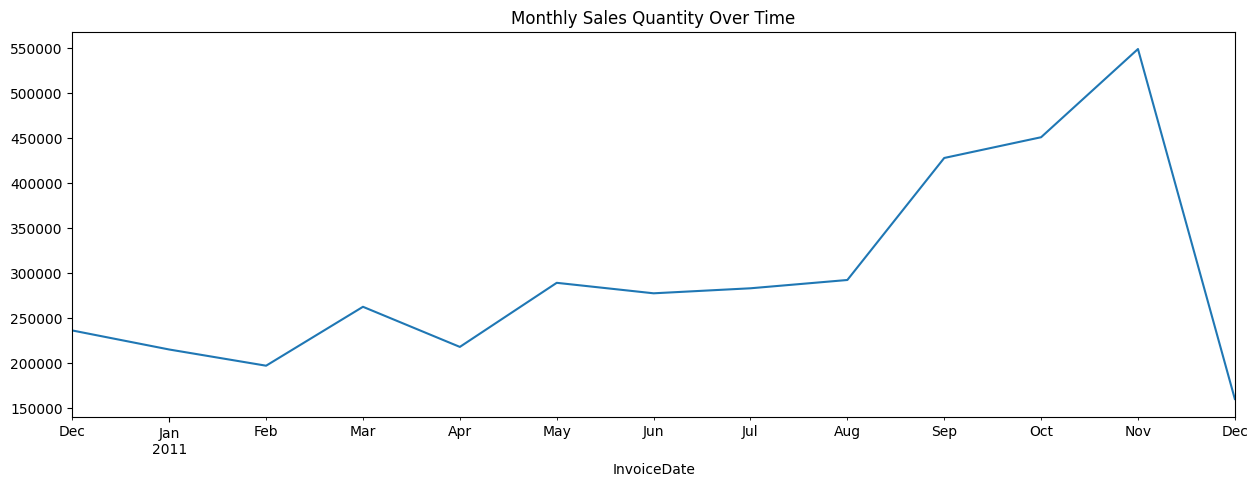

In [13]:
df_final.set_index('InvoiceDate')['Quantity'].resample('M').sum().plot(figsize=(15, 5))
plt.title('Monthly Sales Quantity Over Time')
plt.show()

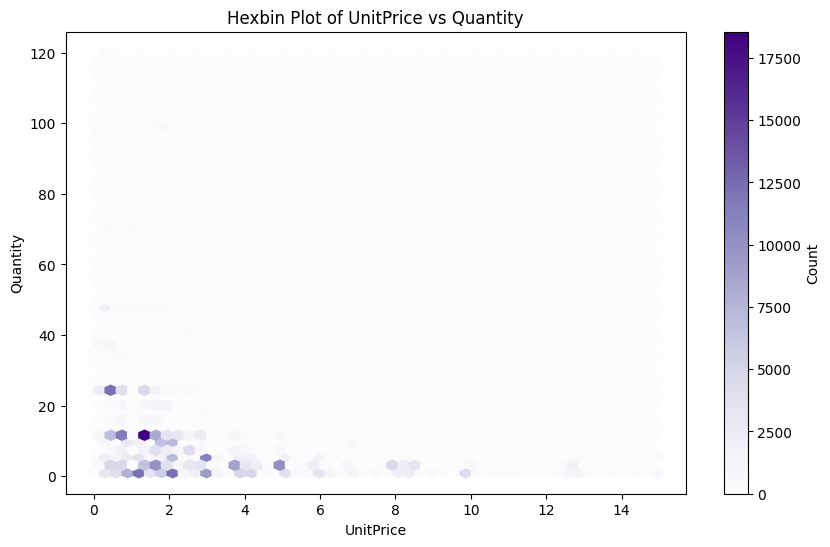

In [14]:
plt.figure(figsize=(10, 6))
plt.hexbin(data=df_final, x='UnitPrice', y='Quantity', gridsize=50, cmap='Purples')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of UnitPrice vs Quantity')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.show()


---
## Feature Engineering

In [15]:
import datetime as dt

# Recency
date = df_final['InvoiceDate'].max() + dt.timedelta(days=1)
recency = df_final.groupby('CustomerID').apply(lambda x: (date - x['InvoiceDate'].max()).days)
recency = recency.reset_index()
recency.columns = ['CustomerID', 'Recency']

# Frequency
frequency = df_final.groupby('CustomerID').InvoiceNo.nunique()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']

# Monetary
df_final['TotalPrice'] = df_final['Quantity'] * df_final['UnitPrice']
monetary = df_final.groupby('CustomerID').TotalPrice.sum()
monetary = monetary.reset_index()
monetary.columns = ['CustomerID', 'Monetary']

rfm = recency.merge(frequency, on='CustomerID').merge(monetary, on='CustomerID')
rfm

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,7,4060.40
1,12348.0,75,4,1186.68
2,12349.0,19,1,1353.80
3,12350.0,310,1,294.40
4,12352.0,36,7,1385.74
...,...,...,...,...
4285,18280.0,278,1,180.60
4286,18281.0,181,1,46.92
4287,18282.0,8,2,178.05
4288,18283.0,4,16,2029.58


---
## Preprocessing for Neural Network

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

rfm_scaled.head()

,Recency,Frequency,Monetary
0,-0.905797,0.375713,0.509439
1,-0.175664,-0.025734,-0.087415
2,-0.735766,-0.427181,-0.052705
3,2.174764,-0.427181,-0.272736
4,-0.565735,0.375713,-0.046071


In [26]:
from sklearn.model_selection import train_test_split

X = rfm_scaled.drop(['Monetary'], axis=1)
y = rfm_scaled['Monetary']

columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (3432, 2)
y_train shape (3432,)
X_test shape (858, 2)
y_test shape (858,)


---
## Neural Network Development

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [55]:
# Define the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.02)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,033 (172.00 KB)

 Trainable params: 44,033 (172.00 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer='sgd', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5901 - val_loss: 0.9911
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8534 - val_loss: 1.2778
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5575 - val_loss: 1.0423
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3114 - val_loss: 0.5375
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7471 - val_loss: 0.5733
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4006 - val_loss: 0.6875
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3412 - val_loss: 0.6469
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8384 - val_loss: 0.9446
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4563 - val_loss: 0.8011
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4644 - val_loss: 1.0798
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3263 - val_loss: 1.1741
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7733 - val_lo

---
## Training and Evaluation

In [70]:
preds = model.predict(X_test).reshape(-1,)

res = pd.DataFrame()
res['Actual'] = y_test.values
res['Preds'] = preds

res

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Actual,Preds
0,0.114360,0.019220
1,-0.264412,-0.225417
2,-0.259765,-0.160196
3,1.134462,2.838985
4,0.023419,0.158085
...,...,...
853,2.116462,0.397756
854,-0.048852,-0.068088
855,-0.179903,-0.066989
856,-0.297940,-0.268076


In [71]:
res.describe()

,Actual,Preds
count,858.000000,858.000000
mean,-0.007410,0.016928
std,0.794071,0.731425
min,-0.330766,-0.278851
25%,-0.270172,-0.246513
50%,-0.201422,-0.218669
75%,-0.004182,0.029188
max,14.288126,12.272408


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
Mean Squared Error (Test Data): 0.18710205558557694
R-squared (Test Data): 0.7029250624139346
     Actual     Preds
0  0.114360  0.019220
1 -0.264412 -0.225417
2 -0.259765 -0.160196
3  1.134462  2.838985
4  0.023419  0.158085


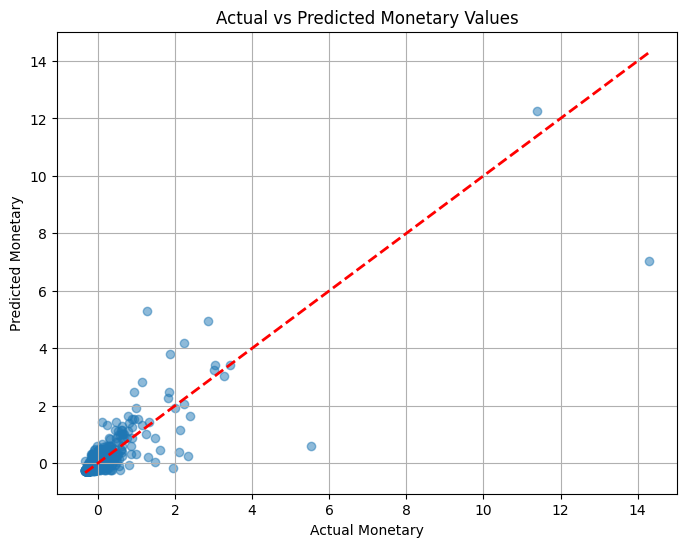

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
preds = model.predict(X_test).reshape(-1,)

# Calculate additional metrics
mse_test = mean_squared_error(y_test, preds)
r2_test = r2_score(y_test, preds)

print(f"Mean Squared Error (Test Data): {mse_test}")
print(f"R-squared (Test Data): {r2_test}")

# Create a DataFrame to store the actual and predicted values
res = pd.DataFrame()
res['Actual'] = y_test.values
res['Preds'] = preds

# Display the results
print(res.head())

# Plot Actual vs Predicted Monetary values
plt.figure(figsize=(8, 6))
plt.scatter(res['Actual'], res['Preds'], alpha=0.5)
plt.plot([res['Actual'].min(), res['Actual'].max()],
         [res['Actual'].min(), res['Actual'].max()],
         'r--', lw=2)
plt.xlabel('Actual Monetary')
plt.ylabel('Predicted Monetary')
plt.title('Actual vs Predicted Monetary Values')
plt.grid(True)
plt.show()

---
## Insights and Market Segmentation

In [73]:
from sklearn.cluster import KMeans

preds_reshaped = preds.reshape(-1, 1)


num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=26)
clusters = kmeans.fit_predict(preds_reshaped)

res['Cluster'] = clusters

cluster_summary = res.groupby('Cluster').agg({
    'Actual': ['mean', 'std', 'min', 'max'],
    'Preds': ['mean', 'std', 'min', 'max']
}).reset_index()

cluster_summary

Cluster    Actual                                    Preds            \
               mean       std       min        max      mean       std   
0       0 -0.167159  0.197260 -0.330766   1.940423 -0.178275  0.109549   
1       1  4.347157  4.318215  1.134462  14.288126  4.860041  2.748679   
2       2  0.495021  0.709666 -0.189658   5.526151  0.670681  0.499511   

                        
        min        max  
0 -0.278851   0.211246  
1  2.838985  12.272408  
2  0.248545   2.461956

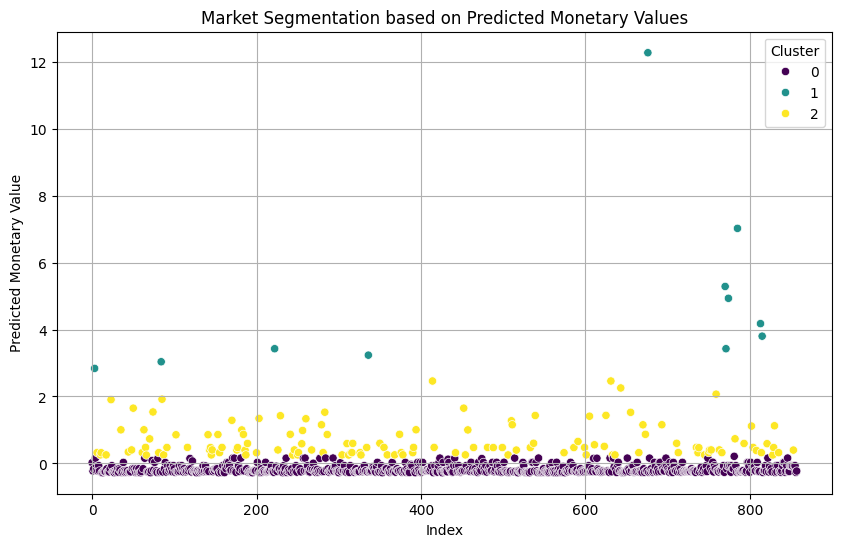

In [74]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=res.index, y=res['Preds'], hue=res['Cluster'], palette='viridis')
plt.title('Market Segmentation based on Predicted Monetary Values')
plt.xlabel('Index')
plt.ylabel('Predicted Monetary Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

---

## Recommendations

#### Based on the market segmentation, we recommend tailored strategies for each customer segment.

- **high-value customers (cluster 2):** focus on exclusive deals, personalized offers, and loyalty programs to enhance engagement and satisfaction. Develop premium products and provide dedicated customer support to maintain their loyalty. 

- **medium-value customers:** offer discounts and bundle deals to increase spending and attract referrals. Develop mid-range products and ensure robust customer support to address their needs efficiently.

- **low-value customers:** use broad marketing campaigns and seasonal discounts to drive sales. Focus on cost-effective products and maintain scalable customer support options to handle a larger volume of inquiries effectively.

> These strategies aim to maximize the value of each customer segment and improve their overall experience with the brand. Implementing these recommendations can lead to increased customer satisfaction, loyalty, and business growth.